# Recursive multiplications

Any integer can be writen as a sum of multiples of power of 10; for example,
\begin{align}
1234 & = 1\times 10^3 + 2\times 10^2 + 3\times 10^1 + 4\times 10^0 \\
     & = 12\times 10^2 + 34\times 10^0 \\
     & = 123\times 10^1 + 4\times 10^0\\
     & = 1234\times 10^0\\
     & = 1\times 10^3 + 23\times 10^1 + 4\times 10^0,\ \text{etc}
\end{align}

## Four products


Assuming that a number $x$ has an *even* number of digits, we can write it as

$$ x = a\times 10^{n-\frac{n}{2}}+b\times 10^{n-n}$$

or more simply

$$ x = a10^{n/2}+b $$

where $n=\lceil log_{10}x \rceil$, and $a, b$ are the left and right halves of the number respectively. Likewise, a number $y$ with the same number of digits can be written as $y = c10^{n/2}+d$. Using this form, we can write their product as:

\begin{align}
xy & = (a10^{n/2}+b)\,(c10^{n/2}+d) \\
   & = ac10^n + (ad+bc)10^{n/2}+bd
\end{align}

For simplicity we'll use numbers with a power-of-2 number of digits.

The formula above suggests that decomposing in halves and multiplying is recursive: to compute the product $xy$ we must compute the products $ac$, $ad$, $bc$, and $bd$. For example, if $x=1234$ and $y=5678$, their product can be written as

$$
1234\times 5678 = (12)(56)10^4 + ((34)(56)+(12)(78))10^2+(34)(78)
$$

In turn, the products $(12)(56)$, $(34)(56)$, $(12)(78)$, and $(34)(78)$ can be written as

\begin{align}
(12)(56) & = (1)(5)10^2+((2)(5)+(1)(6))10+(2)(6) = 500 + 160 + 12 = 672  \\
(34)(56) & = (3)(5)10^2+((4)(5)+(3)(6))10+(4)(6) = 1500 + 380 + 24 = 1904  \\
(12)(78) & = (1)(7)10^2+((2)(7)+(1)(8))10+(2)(8) = 700 + 220 + 16  = 936 \\
(34)(78) & = (3)(7)10^2+((4)(7)+(3)(8))10+(4)(8) = 2100 + 520 + 32 = 2652
\end{align}

This last group of multiplications above involves only single-digit products which are easy to compute. Now, we can replace these products in the previous formula. All we have to do next is to multiply by powers-of-10 and add. Both operations are straightforward. Multiplication by a power-of-10 is simply shifting the number as many positions to the left. And adding is quite fast to perform.

## Three multiplications

We can do better than four products. As [Anatoly Karatsuba](https://en.wikipedia.org/wiki/Anatoly_Karatsuba) observed, the quantity $(ad+bc)$ which requires two multiplications and one addition, can be rewritten as $(a+b)(c+d)-ac-bd$. This new expression requires two additions, two subtractions, and one multiplication. The recursive product $xy$ can be written as

$$
xy = ac10^n +((a+b)(c+d)-ac-bd)10^{n/2}+bd
$$

There are three multiplications above, $ac$, $(a+b)(c+d)$, and $bd$. Adding and subtracting numbers is fast (does not require any expensive recursive calls).

## Additions

Adding two integer as arrays is straight-forward. We traverse the arrays from back to front, adding the corresponding digits and the carry digit. Then we separate the summation digit using modulo and the carry digit using integer division. We need to be careful when the two numbers we add do not have the same length. This can be addressed in two ways: other left-padding the shorter one with 0s to make its length same as the other number, or by using two tandem loops: one for adding digits from both numbers and one for processing the remaininig digits of the longer number.

## Subtractions

Subtractions are a bit challeging, especially when dealing with negative results. At first, it may seem easy to perform single digit operations, for example

```text
   [3, 3] array x
-  [1, 6] array y
=========
   [1, 7]
```
loading a "carry" for turning `x[1]-y[1]` to `10+x[1]-y[1]` and then propagate the carry to the next pair as `x[0]-y[0]+carry`. The joy doesn't last long. If we attempt to subtract
```text
   [1, 6] array x
-  [3, 3] array y
```

using the same "carry" technique, we'll come up with `[1,8,3]` or something simarly wrong. We have to reinvent digit-by-digit subtractions.

Subtracting 33 from 16 is the same as adding adding the [**nine's complement**](https://en.wikipedia.org/wiki/Method_of_complements) of 33 to 16, then converting the sum  back into nine's complement. The nine's complemnet of 33 is 66, and so $66+16=82$. The nine's complement of 82 is 17. Somewhere there, is a minus sign. The 9's complement is the digit we add to another digit to get 9, i.e.,
$$
\text{9's complement of }x = 9-x
$$

Using 9's complement we can write the subtraction $x-y$ as
$$
y-x = y+(\text{9's complement of }x)+1
$$

## Assignment

Implement both recursive multiplications (the one with the four products and also Karatsuba's version). I suggest that you head your methods as

```python
legacy_multiplication(x, y, base=10)
```
and

```python
karatsuba_multiplication(x, y, base=10)
```
respectively.

Then write a third method to organize an experiment measuring the performance of each method. The method should run both ``legacy_multiplication`` and ``karatsuba_multiplication`` for multiple sizes of `x` and `y` and track how long it takes each method to complete.

You may time the performance of a method using Python's [`time.perf_counter`](https://docs.python.org/3/library/time.html#time.perf_counter). For example,

```python
import time
...
start_time = time.perf_counter()
method_to_test
end_time = time.perf_counter()
```

The output of your experiments should be a table of values such as the foolowing:

```text
          n           legacy       karatsuba
        ====    ============    ============
           2    0.0000133514    0.0000240803
           4    0.0000886917    0.0000920296
           8    0.0003507137    0.0002956390
          16    0.0019903183    0.0013806820
          32    ...             ...
```
where `n` is the size of the arrays to multiply. Ideally you want to have data for 10-15 sizes, from `n=2` through at least `n=1024`.

Then create the best line plot with this data, establishing the performance characteristics of both techniques.

The specifications of this assignment are intentionally vague to provide you with some latitude on how to execute. For example, the line plot can be done on a spreadsheet or a more advanced tool if you prefer.

To assist you in this work, the following methods are already provided:

* `shift` to multiply a number represented as an array, by a power of 10. For example, `shift([1,2,3], 3)` will return `[1,2,3,0,0,0]`.

* `add` to add two integers represented as arrays.

* `subtract` to subtract two integers represented as arrays.

In [ ]:
def shift(array, by):
  """Zero pads an array to the right, essentially multiplying the number the
  array reprents by 10^by"""
  return array+[0 for _ in range(by)]

def add(a, b, base=10):
  """Adds two integers represented as arrays and returns their sum as an array
  """
  # make sure a is the longer of the two arrays
  if len(a) < len(b):
    a, b = b, a
  # Initialize output array
  result = [0 for _ in range(len(a))]
  # Traverse arrays from back-to-front, for the single digit operations
  j = len(a)-1
  delta = len(a)-len(b)
  carry = 0
  while j >= 0:
    sum = carry + a[j]
    i = j-delta
    if i >= 0:
      sum += b[i]
    carry = sum // base
    result[j] = sum % base
    j -= 1
  return result if carry == 0 else [carry]+result

def subtract(x, y, base=10):
  """Subtracts two integers, represented as arrays, using 9's complement."""
  # Ensure x has same length as y
  while len(x) < len(y):
    x.insert(0,0)
  # Ensure y has same length as x
  while len(y) < len(x):
    y.insert(0,0)
  # convert y to 9 comp
  y9 = [9 - digit for digit in y]
  # add x, y9, store result in array sum[]
  carry = 0
  sum = []
  for i in range(len(x)-1, -1, -1):
    temp = carry + x[i] + y9[i]
    sum.insert(0, temp % base)
    carry = temp // base
  if carry==1:
    # If carry==1 at the end, add it to least significant digit
    sum[len(sum)-1] +=1
  else:
    # If no carry, take 9's complement one more time and mark as negative
    sum = [-(9-digit) for digit in sum]
  return sum[1:] if sum[0]==0 else sum

In [ ]:
def legacy_multiplication(x, y, base=10):
    """ legacy recursive multplication implementation that multiplies
        two integer arrays using 4 multiplications"""

    # Base case, both lists are less than or equal to one
    if len(x) <= 1 and len(y) <= 1:
        # Return the product, accounting for the case that it's a two digit number
        product = x[0] * y[0]
        return [int(digit) for digit in str(product)]
    else:
        # Get midpoint and split
        n = max(len(x), len(y))
        mid = n // 2
        a = x[:mid]
        b = x[mid:]
        c = y[:mid]
        d = y[mid:]

        # Get the correct multiplication values from recursion
        ac = legacy_multiplication(a, c)
        ad = legacy_multiplication(a, d)
        bc = legacy_multiplication(b, c)
        bd = legacy_multiplication(b, d)

        # Shift ac by 10^n
        ac_shifted = shift(ac, n)

        # add ad + bc according to the formula and shift by 10 ^ n/2
        ad_bc = add(ad, bc)
        ad_bc_shifter = shift(ad_bc, mid)

        # Add according to the formula and return the result
        ac_bd = add(ac_shifted, bd)
        return add(ad_bc_shifter, ac_bd)


def karatsuba_multiplication(x, y, base=10):
    """ karatsuba multiplication implementation that multiplies two
        integer arrays using karatsuba multiplication formula, making it
        have 3 multiplications instead of 4"""

    # Base case: if both lists represent single digits
    if len(x) == 1 and len(y) == 1:
        product = x[0] * y[0]
        return [int(digit) for digit in str(product)]
    else:
        # Make both lists the same length by padding the shorter one with zeros
        n = max(len(x), len(y))
        if len(x) < n:
            x = [0] * (n - len(x)) + x
        if len(y) < n:
            y = [0] * (n - len(y)) + y

        # Split the lists into two halves
        mid = n // 2
        a = x[:mid]
        b = x[mid:]
        c = y[:mid]
        d = y[mid:]

        # Recursive Karatsuba calls
        ac = karatsuba_multiplication(a, c)
        bd = karatsuba_multiplication(b, d)

        # (a + b) * (c + d)
        a_b = add(a, b)
        c_d = add(c, d)
        a_b_c_d = karatsuba_multiplication(a_b, c_d)

        # (a + b) * (c + d) - ac - bd
        middle_term = subtract(subtract(a_b_c_d, ac), bd)

        # Shift ac by 10^n and middle section by 10^n/2
        ac_shifted = shift(ac, n)
        middle_term_shifted = shift(middle_term, mid)

        # Combine the results and return
        result = add(ac_shifted, middle_term_shifted)
        result = add(result, bd)

        # Not sure if i should remove the leading zeros but I wrote code to do so
        '''
        i = 0
        while i < len(result):
            if result[i] == 0:
                i += 1
            else:
                return result[i:]
        '''
        return result


Sample legacy and karatsuba example

In [ ]:
print(legacy_multiplication([1,2,3,4], [5,6,7,8]))
print(karatsuba_multiplication([1,2,3,4], [5,6,7,8]))

[7, 0, 0, 6, 6, 5, 2]
[0, 0, 0, 0, 0, 6, 5, 9, 2, 6, 5, 2]


Method to time the legacy and karatsuba methods based on a limit of the size of n (array size)

In [ ]:
import time
import random
import pandas as pd

def time_mult(size=1024):
    """ method to time the legacy multiplication and karatsuba multiplication.
        method returns a pandas dataframe with the size of n and the time it took
        legacy and karatsuba to multiply the numbers"""
    # Initialize the first value of n
    n = 2
    time_dict = {
        'n': [],
        'legacy': [],
        'karatsuba': []
    }

    # Timing the functions
    while n < size:
        # Double n
        n = n * 2
        x = [random.randint(0, 9) for _ in range(n)]
        y = [random.randint(0, 9) for _ in range(n)]

        # Timing legacy multiplication
        legacy_start_time = time.perf_counter()
        legacy_multiplication(x, y)
        legacy_end_time = time.perf_counter()

        # Timing Karatsuba multiplication
        karatsuba_start_time = time.perf_counter()
        karatsuba_multiplication(x, y)
        karatsuba_end_time = time.perf_counter()

        # Store the timings
        time_dict['n'].append(n)
        time_dict['legacy'].append(legacy_end_time - legacy_start_time)
        time_dict['karatsuba'].append(karatsuba_end_time - karatsuba_start_time)

    # Print out the results. Initial header
    print("  n           legacy       karatsuba")
    print("====    ============    ============")

    # loop over and print out the value of n, and the time
    # it took for each method to multiply.
    for i in range(len(time_dict['n'])):
        n_value = time_dict['n'][i]
        legacy_value = time_dict['legacy'][i]
        karatsuba_value = time_dict['karatsuba'][i]

        print(f"{n_value:>4}    {legacy_value :>12.10}s   {karatsuba_value :>12.10}s")


    # Place the results in a dataframe and return which we will use for plotting
    df = pd.DataFrame(time_dict)
    return df


In [ ]:
# Call the method
df = time_mult(8192)

  n           legacy       karatsuba
====    ============    ============
   4      0.00011692s   0.0001825489999s
   8     0.000222961s    0.000525078s
  16    0.0009095070002s    0.001635763s
  32     0.003689374s    0.009462189s
  64     0.027500052s     0.01930035s
 128      0.06384285s    0.047207455s
 256     0.251185377s    0.147069712s
 512     1.021423016s    0.410890491s
1024     5.549268636s    1.243741557s
2048     17.16602953s    4.299942582s
4096      71.2629286s    13.63628631s
8192     289.1569044s     37.2255581s


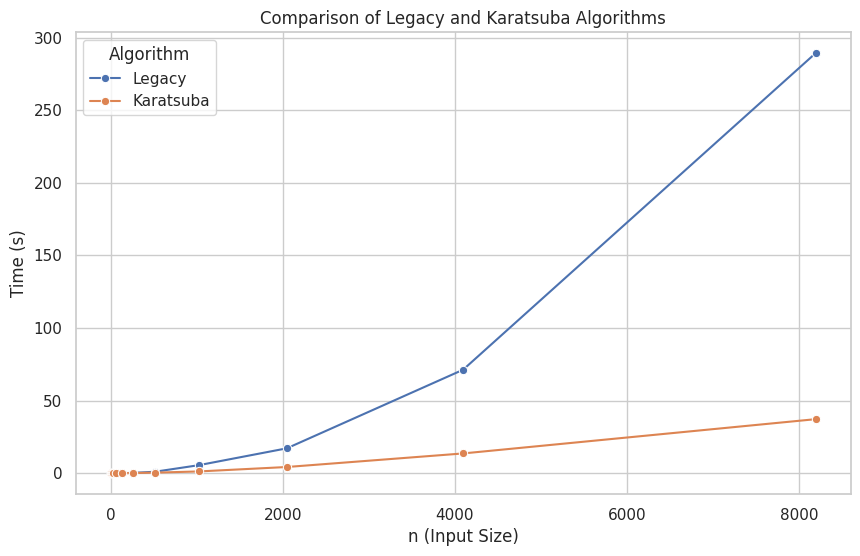

In [ ]:
# imports needed for plotting
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# df is defined from the method above

# Set plot style
sns.set(style="whitegrid")

# Create the lineplot and label the legacy and karatsuba lines
plt.figure(figsize=(10, 6))
sns.lineplot(x='n', y='legacy', data=df, label='Legacy', marker='o')
sns.lineplot(x='n', y='karatsuba', data=df, label='Karatsuba', marker='o')

# add some labels
plt.xlabel('n (Input Size)')
plt.ylabel('Time (s)')
plt.title('Comparison of Legacy and Karatsuba Algorithms')
plt.legend(title='Algorithm')

# Plot the plot :)
plt.show()